In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Load the datasets
import csv
path='/home/lz/work/pulsar_kick_velocity/Pulsar_PA15_new_parallax1.txt'
data = pd.read_csv(path,delimiter='\t')
name = list(data.iloc[:,0]) 
parallax = list(data.iloc[:,1]) 
p_err_up = list(data.iloc[:,2]) 
p_err_low = list(data.iloc[:,3]) 
alpha = list(data.iloc[:,4]) 
alpha_err=list(data.iloc[:,5]) 
beta=list(data.iloc[:,6]) 
beta_err=list(data.iloc[:,7]) 
zeta=list(data.iloc[:,8]) 


In [2]:
print(data)

        Jname  Parallax(mas)  P_err_up  P_err_low  Alpha  Alpha_err   Beta  \
0  J1321+8323          0.970     0.040     -0.140 -52.66       0.09  32.45   
1  J0152-1637          0.440     0.210     -0.180   0.80       0.20 -31.30   
2  J1543-0620          0.330     0.028     -0.045 -16.79       0.04  -0.30   
3  J1840+5640          0.657     0.065     -0.008 -31.21       0.03 -29.10   
4  J1932+1059          2.770     0.070     -0.070  94.09       0.11  42.99   
5  J2157+4017          0.280     0.060     -0.060  16.13       0.10   4.12   

   Beta_err   zeta  
0      0.13  162.6  
1      0.40   88.7  
2      0.13   39.6  
3      0.06   30.6  
4      0.16   68.0  
5      0.12  104.4  


In [3]:
#将视差转化为距离kpc，并将list 转化为numpy
distance = [1 / p for p in parallax]  # 对每个视差值计算距离
distance=np.array(distance)
parallax=np.array(parallax)
alpha = np.array(alpha)  # 将 alpha 转换为数组
beta = np.array(beta) 
zeta=np.array(zeta)
#Pulsar_PA15_new数组的2D速度
V_trans= 4.74*distance*np.sqrt(alpha**2+beta**2) #km/s
#zeta是自转-视线夹角
sin_zeta = np.sin(np.deg2rad(180-zeta))
sqrt_alpha_beta=np.sqrt(alpha**2+beta**2)
V_3D=V_trans/sin_zeta
print(V_trans)
print(V_3D)
print(zeta)
print(name)

[302.26197994 337.29648216 241.20394841 307.85976349 177.01584337
 281.82451634]
[1010.77173338  337.38332149  378.40425257  604.7833319   190.91773708
  290.96574011]
[162.6  88.7  39.6  30.6  68.  104.4]
['J1321+8323', 'J0152-1637', 'J1543-0620', 'J1840+5640', 'J1932+1059', 'J2157+4017']


In [4]:
dV_dp = - (4.74 * sqrt_alpha_beta) / (parallax**2 * sin_zeta) #V 对parallax的偏导数
dV_dalpha = (4.74 * alpha) / (parallax * sqrt_alpha_beta * sin_zeta) # V对 \alpha的偏导数
dV_dbeta = (4.74 * beta) / (parallax * sqrt_alpha_beta * sin_zeta)  # V对 \beta的偏导数

# 计算上限误差
sigma_V_pos = np.sqrt(
    (dV_dp * p_err_low)**2 +
    (dV_dalpha * alpha_err)**2 +
    (dV_dbeta * beta_err)**2
)

# 计算下限误差
sigma_V_neg = np.sqrt(
    (dV_dp * p_err_up)**2 +
    (dV_dalpha * alpha_err)**2 +
    (dV_dbeta * beta_err)**2
)

print("V =", V_3D, "km/s")
print("sigma_V_pos=",sigma_V_pos, "km/s")
print("sigma_V_neg=",sigma_V_neg, "km/s")

V = [1010.77173338  337.38332149  378.40425257  604.7833319   190.91773708
  290.96574011] km/s
sigma_V_pos= [145.89420934 138.08770135  51.60847572   7.39352194   4.82972755
  62.37495288] km/s
sigma_V_neg= [ 41.71499853 161.08150598  32.11971568  59.83758571   4.82972755
  62.37495288] km/s


In [5]:
path1='/home/lz/work/pulsar_kick_velocity/Pulsar_PA15_new_1.txt'
data1 = pd.read_csv(path1,delimiter='\t')
name1 = list(data1.iloc[:,0]) 
distance1=list(data1.iloc[:,1])
alpha1=list(data1.iloc[:,2])
alpha1_err=list(data1.iloc[:,3])
beta1=list(data1.iloc[:,4])
beta1_err=list(data1.iloc[:,5])
zeta1=list(data1.iloc[:,6])
zeta1_err=list(data1.iloc[:,7])

In [6]:
print(data1)

         Jname  Distance(kpc)  Alpha  Alpha_err   Beta  Beta_err   zeta  \
0   J0139+5814          2.600 -19.11       0.07 -16.60      0.07   73.1   
1   J0534+2200          2.000 -11.34       0.06   2.65      0.14   61.3   
2   J0908-1739          0.805  27.00      11.00 -40.00     11.00   80.4   
3   J1041-1942          2.532  -1.00       3.00  14.00      5.00  150.3   
4   J1115+5030          0.923  22.00       3.00 -51.00      3.00  148.4   
5   J1328-6038          1.424   3.00       7.00  54.00      2.30   32.6   
6   J1913-0440          4.041   7.00      13.00  -5.00      9.00   35.2   
7   J2257+5909          3.000  18.00       4.53  -2.00      4.52  125.9   
8   J2326+6113          2.733  17.00       5.00  -9.00      5.00   23.2   
9   J0835-4510          0.280 -49.68       0.06  29.90      0.10   63.6   
10  J1709-4429          2.600  13.00       2.00  -1.00      2.00   55.0   

    zeta_err  
0       0.00  
1       0.01  
2       0.00  
3       0.00  
4       0.00  
5       0

In [7]:
distance1=np.array(distance1)
distance1_err=0.2*distance1
alpha1=np.array(alpha1)
beta1=np.array(beta1)
zeta1=np.array(zeta1)
sqrt_alpha_beta1=np.sqrt(alpha1**2+beta1**2)
V_trans1= 4.74* distance1 * np.sqrt(alpha1**2+beta1**2) #km/s
sin_zeta1 = np.sin(np.deg2rad(180-zeta1))
sin_zeta1=np.abs(sin_zeta1)
V1_3D=V_trans1/sin_zeta1
print(V1_3D)
print(name1)

[326.03886777 125.8621647  186.7599706  339.99123807 463.75437666
 677.55917139 285.84771938 317.92828969 632.5380416   85.91603196
 196.16053211]
['J0139+5814', 'J0534+2200', 'J0908-1739', 'J1041-1942', 'J1115+5030', 'J1328-6038', 'J1913-0440', 'J2257+5909', 'J2326+6113', 'J0835-4510', 'J1709-4429']


In [8]:
cos_zeta1=np.cos(np.deg2rad(180-zeta1))
cos_zeta1=np.abs(cos_zeta1)

In [9]:
dV_dD1 = (4.74 * sqrt_alpha_beta1) / sin_zeta1
dV_dalpha1 = (4.74 * distance1 * alpha1) / (sqrt_alpha_beta1 * sin_zeta1)
dV_dbeta1 = (4.74 * distance1 * beta1) / (sqrt_alpha_beta1 * sin_zeta1)
dV_dzeta1 = -V_trans1/(sin_zeta1) * (cos_zeta1/sin_zeta1)  # 注意负号

sigma_V_distance=dV_dD1 * distance1
sigma_V_alpha = dV_dalpha1 * alpha1_err
sigma_V_beta = dV_dbeta1 * beta1_err
sigma_V_zeta = dV_dzeta1 * zeta1_err

# 计算总误差
sigma_V = np.sqrt(
    sigma_V_distance**2 +
    sigma_V_alpha**2 +
    sigma_V_beta**2 +
    sigma_V_zeta**2
)

print("V =", V1_3D, "km/s ±", sigma_V, "km/s")

V = [326.03886777 125.8621647  186.7599706  339.99123807 463.75437666
 677.55917139 285.84771938 317.92828969 632.5380416   85.91603196
 196.16053211] km/s ± [326.04011442 125.86610589 191.54997287 360.854098   464.43034907
 678.18715635 485.27065685 327.72228759 653.55830145  86.02189045
 200.34713948] km/s


In [10]:
V_3D_new=np.concatenate((V_3D, V1_3D))
V_3D_err_pos=np.concatenate((sigma_V_pos,sigma_V))
V_3D_err_neg=np.concatenate((sigma_V_neg, sigma_V))
V_3D_err_pos=np.append(V_3D_err_pos,75)
V_3D_err_neg=np.append(V_3D_err_neg,57)
V_3D_new=np.append(V_3D_new, 407.0)
print(V_3D_new)
print(V_3D_err_pos)
print(V_3D_err_neg)
print(len(V_3D_new))

[1010.77173338  337.38332149  378.40425257  604.7833319   190.91773708
  290.96574011  326.03886777  125.8621647   186.7599706   339.99123807
  463.75437666  677.55917139  285.84771938  317.92828969  632.5380416
   85.91603196  196.16053211  407.        ]
[145.89420934 138.08770135  51.60847572   7.39352194   4.82972755
  62.37495288 326.04011442 125.86610589 191.54997287 360.854098
 464.43034907 678.18715635 485.27065685 327.72228759 653.55830145
  86.02189045 200.34713948  75.        ]
[ 41.71499853 161.08150598  32.11971568  59.83758571   4.82972755
  62.37495288 326.04011442 125.86610589 191.54997287 360.854098
 464.43034907 678.18715635 485.27065685 327.72228759 653.55830145
  86.02189045 200.34713948  57.        ]
18


In [11]:
PA=[12,11,11,1,13,7]
PA1=[6,8,14,8,12,7,4,8,14,5.8,1]
PA_err = [14.3,9,10.2,5.4,1,7.1]
PA1_err=[3.2,10,14.1,2.2,2,8.6,6.1,12.4,24,1,12.2]
PA_cos=np.cos(np.deg2rad(PA))
PA1_cos=np.cos(np.deg2rad(PA1))
#将两个样本中的zeta,PA值结合用来计算
#sin_zeta_new is $\zeta_{r} $ in the literature 
sin_zeta_new=np.concatenate((sin_zeta, sin_zeta1))
cos_zeta_new=np.sqrt(1-sin_zeta_new**2)
PA_new=np.concatenate((PA, PA1))
PA_new_err=np.concatenate((PA_err,PA1_err))
# 将样本PSR J0538+2817添加进，共有24个样本，PA角为 4.5 \pm 1.7
#PA_new=np.concatenate((PA_new, 4.5))
zeta_v=np.linspace(0,180,100)
sin_zeta_v=np.sin(np.deg2rad(zeta_v))
#PA_real_cos=sin_zeta_new*sin_zeta_v*np.cos(np.deg2rad(PA_new))+cos_zeta_new*(np.sqrt(1-sin_zeta_v**2))
#PA_real=np.arccos(PA_real_cos)


In [12]:
cos30 = 0.8660254037844387  # 已知的余弦值
angle_rad = np.arccos(cos30)  # 计算弧度（结果为 π/6 ≈ 0.5236 弧度）
angle_deg = np.rad2deg(angle_rad)  # 转换为角度

print(angle_deg)  # 输出：30.0

29.999999999999993


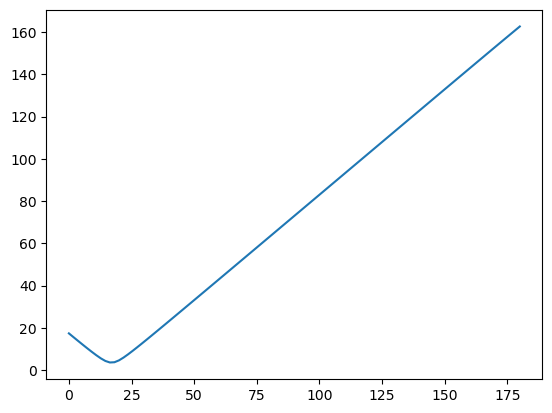

In [13]:
cos_zeta_v=np.cos(np.deg2rad(zeta_v))
cos_pa=np.cos(np.deg2rad(PA_new[:1]))
cos_chi=sin_zeta_new[:1]*sin_zeta_v*cos_pa+cos_zeta_v*cos_zeta_new[:1]
chi_r=np.arccos(cos_chi)
chi_r_deg=np.rad2deg(chi_r)

cos_chi_s=sin_zeta_new[:1]*sin_zeta_new[:1]*cos_pa+cos_zeta_new[:1]*cos_zeta_new[:1]
cos_chi_s=np.arccos(cos_chi_s)
cos_chi_deg=np.rad2deg(cos_chi_s)
plt.plot(zeta_v,chi_r_deg)
#plt.scatter(zeta_new[:1],cos_chi_deg)
plt.show()

In [14]:
zeta_new = np.rad2deg(np.arcsin(sin_zeta_new))

In [15]:

PA_new_err_rad = np.deg2rad(PA_new_err)
name_c=np.concatenate((name,name1))
#name_total=np.concatenate((name_c,))

<>:110: SyntaxWarning: invalid escape sequence '\z'
<>:111: SyntaxWarning: invalid escape sequence '\c'
<>:110: SyntaxWarning: invalid escape sequence '\z'
<>:111: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_1474183/1994527757.py:110: SyntaxWarning: invalid escape sequence '\z'
  plt.xlabel("$\zeta_{v}(^{\circ})$", fontsize=24)
/tmp/ipykernel_1474183/1994527757.py:111: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel("$\chi(^{\circ})$", fontsize=24)


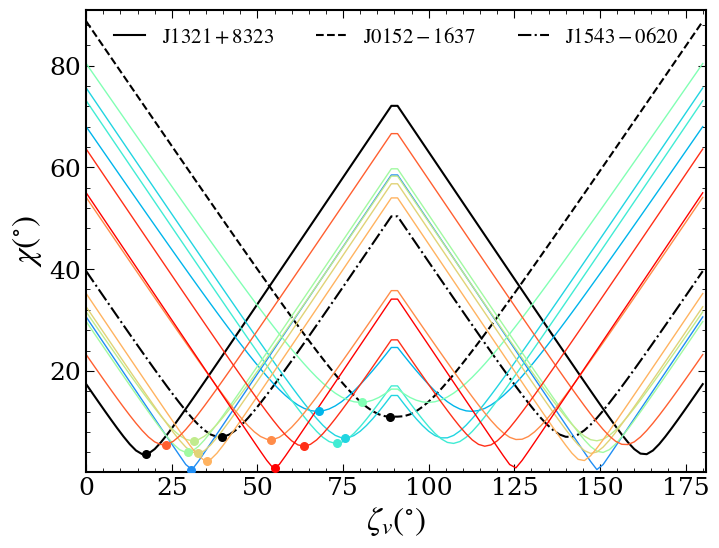

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from matplotlib.ticker import MultipleLocator, FuncFormatter

# --- 参数设置 ---
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["STIX Two Text", "Times", "DejaVu Serif"],
    "mathtext.fontset": "stix",
    "axes.labelsize": 24,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "axes.linewidth": 1.5,
    "xtick.major.size": 6,
    "ytick.major.size": 6,
    "xtick.minor.size": 3,
    "ytick.minor.size": 3,
})

# --- 计算部分 (保持不变) ---
# 初始化用于存储PA_real的数组
PA_real = []

# 对每个 zeta_v 计算 PA_real
for zv in zeta_v:
    sin_zeta_v = np.sin(np.deg2rad(zv))  # 计算当前zeta_v的sin值
    cos_zeta_v = np.sqrt(1 - sin_zeta_v**2)  # 计算对应的cos值

    # 计算每个 PA_new 对应的 PA_real
    PA_real_vals = []
    for i in range(len(PA_new)):
        # PA_real_cos 的计算公式
        PA_real_cos = sin_zeta_new[i] * sin_zeta_v * np.cos(np.deg2rad(PA_new[i])) + cos_zeta_new[i] * cos_zeta_v
        # 计算 PA_real（通过arccos来得到角度）
        # 使用 clip 防止浮点误差导致数值略微超出 [-1, 1]
        val = np.clip(PA_real_cos, -1.0, 1.0)
        PA_real_vals.append(np.rad2deg(np.arccos(val)))

    # 将 PA_real_vals 添加到结果列表中
    PA_real.append(PA_real_vals)

# --- 绘图部分 (核心修改) ---

# 创建颜色映射
cmap = plt.get_cmap('rainbow')  # 选择 colormap
norm = Normalize(vmin=0, vmax=len(PA_new) - 1)  # 归一化到 PA_new 的索引范围

fig, ax = plt.subplots(figsize=(8, 6))

# 转换为NumPy数组，以便于绘制
PA_real = np.array(PA_real)
PA_real_new = []
zeta_new = np.rad2deg(np.arcsin(sin_zeta_new))

# 处理名称中的负号（如果需要）
processed_names = [name.replace('-', '\u2212') for name in name_c] 

for i in range(len(PA_new)):
    # 排除索引为7的数据（根据源代码逻辑）
    if i != 7:
        # 1. 计算当前点的 Y 值
        PA_real_cos_new = sin_zeta_new[i] * sin_zeta_new[i] * np.cos(np.deg2rad(PA_new[i])) + cos_zeta_new[i] * (np.sqrt(1 - sin_zeta_new[i]**2))
        val_new = np.clip(PA_real_cos_new, -1.0, 1.0)
        current_pa_real_new = np.rad2deg(np.arccos(val_new))
        PA_real_new.append(current_pa_real_new)
        
        # 2. 设置样式逻辑 (关键修改)
        # 默认样式 (用于 i >= 3 的情况)
        color = cmap(norm(i))
        linestyle = '-'
        current_label = None
        linewidth = 1.0
        
        # 前三条线的特殊设置
        if i < 3:
            color = 'black'        # 统一为黑色
            linewidth = 1.5        # 稍微加粗一点更清晰
            current_label = f"$\\mathrm{{{name_c[i]}}}$"
            
            if i == 0:
                linestyle = '-'    # 第一条：实线
            elif i == 1:
                linestyle = '--'   # 第二条：虚线
            elif i == 2:
                linestyle = '-.'   # 第三条：电线 (使用点划线表示)
        
        # 3. 绘制散点 (点跟随线的颜色)
        plt.scatter(zeta_new[i], current_pa_real_new, color=color, s=30, zorder=3)
        
        # 4. 绘制线条
        plt.plot(zeta_v, PA_real[:, i], 
                 label=current_label, 
                 linewidth=linewidth, 
                 color=color, 
                 linestyle=linestyle)

# --- 坐标轴与图例设置 ---
ax.set_xlim(min(zeta_v), max(zeta_v) + 1)  
# 根据数据动态调整 ylim，或者保持您原来的硬编码
ax.set_ylim(min(PA_real_new) - 0.3 if PA_real_new else 0, 90 + 1) 

plt.tick_params(top='on', right='on', which='both')
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(4))
ax.tick_params(axis='both', which='both', direction='in')

# 标签
plt.xlabel("$\zeta_{v}(^{\circ})$", fontsize=24)
plt.ylabel("$\chi(^{\circ})$", fontsize=24)

# 图例设置
# 注意：只有前三个设置了 label，所以图例只会显示这三个
plt.legend(bbox_to_anchor=(0.5, 0.88), 
           loc="lower center", 
           ncol=3, 
           borderaxespad=0.5, 
           prop={"size": 15}, 
           labelspacing=0.5, 
           handlelength=1.5, #稍微增加handle长度以便看清线型
           markerscale=1, 
           frameon=False) # 如果想要无边框

# 如果想要有边框且透明度为1，可以取消下面的注释，并把上面 frameon 改为 True
# plt.rcParams['legend.framealpha'] = 1.0     
# plt.rcParams['legend.edgecolor'] = 'black'  

plt.savefig('chi_zeta.pdf', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

<>:70: SyntaxWarning: invalid escape sequence '\z'
<>:71: SyntaxWarning: invalid escape sequence '\c'
<>:70: SyntaxWarning: invalid escape sequence '\z'
<>:71: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_1467375/3927737917.py:70: SyntaxWarning: invalid escape sequence '\z'
  plt.xlabel("$\zeta_{v}(^{\circ})$",fontsize=24)
/tmp/ipykernel_1467375/3927737917.py:71: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel("$\chi(^{\circ})$",fontsize=24)


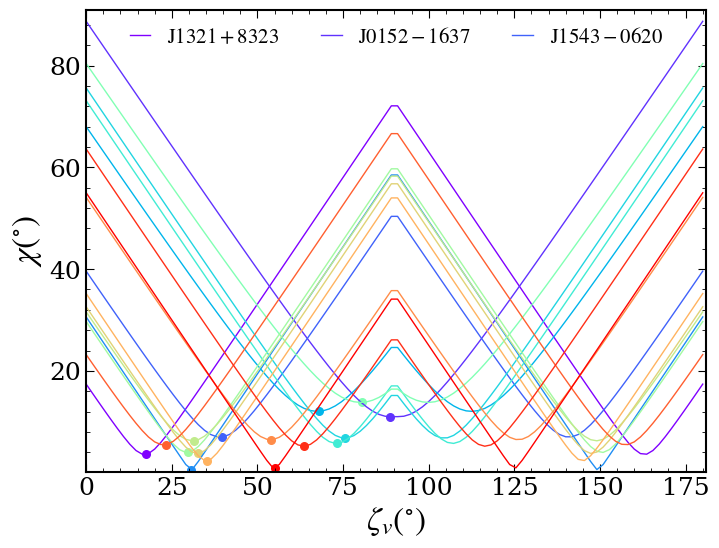

In [30]:
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from matplotlib.ticker import MultipleLocator,FuncFormatter
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["STIX Two Text", "Times", "DejaVu Serif"],
    "mathtext.fontset": "stix",
    "axes.labelsize": 24,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "axes.linewidth": 1.5,
    "xtick.major.size": 6,
    "ytick.major.size": 6,
    "xtick.minor.size": 3,
    "ytick.minor.size": 3,
})
# 初始化用于存储PA_real的数组
PA_real = []

# 对每个 zeta_v 计算 PA_real
for zv in zeta_v:
    sin_zeta_v = np.sin(np.deg2rad(zv))  # 计算当前zeta_v的sin值
    cos_zeta_v = np.sqrt(1 - sin_zeta_v**2)  # 计算对应的cos值

    # 计算每个 PA_new 对应的 PA_real,len(PA_new) in range 
    PA_real_vals = []
    for i in range(len(PA_new)):
        # PA_real_cos 的计算公式
        PA_real_cos = sin_zeta_new[i] * sin_zeta_v * np.cos(np.deg2rad(PA_new[i])) + cos_zeta_new[i] * cos_zeta_v
        # 计算 PA_real（通过arccos来得到角度）
        PA_real_vals.append(np.rad2deg(np.arccos(PA_real_cos))) # 使用clip避免超出[-1, 1]范围

    # 将 PA_real_vals 添加到结果列表中
    PA_real.append(PA_real_vals)


# 创建颜色映射
cmap = plt.get_cmap('rainbow')  # 选择 colormap
norm = Normalize(vmin=0, vmax=len(PA_new) - 1)  # 归一化到 PA_new 的索引范围

fig,ax=plt.subplots(figsize=(8,6))
# 转换为NumPy数组，以便于绘制
PA_real = np.array(PA_real)
PA_real_new=[]
zeta_new = np.rad2deg(np.arcsin(sin_zeta_new)) 
processed_names = [name.replace('-', '\u2212') for name in name_c]
for i in range(len(PA_new)):   
        color = cmap(norm(i))  # 根据索引获取颜色
        PA_real_cos_new = sin_zeta_new[i] * sin_zeta_new[i] * np.cos(np.deg2rad(PA_new[i])) + cos_zeta_new[i] * (np.sqrt(1 - sin_zeta_new[i]**2))
        PA_real_new.append(np.rad2deg(np.arccos(PA_real_cos_new)))
        if i!=7:
            if i < 3:
            # 建议使用 $\mathrm{}$ 格式，确保横杠长度和字体与正文对齐
                current_label = f"$\\mathrm{{{name_c[i]}}}$" 
            else:
                current_label = None

            plt.scatter(zeta_new[i],PA_real_new[i],color=color,s=30)
            plt.plot(zeta_v, PA_real[:, i],label=current_label,linewidth=1,markersize=1,color=color)

ax.set_xlim(min(zeta_v), max(zeta_v) + 1)  # 根据zeta_v的实际范围调整
ax.set_ylim(min(PA_real_new) - 0.3, 90 + 1)  

plt.tick_params(top='on', right='on', which='both')
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(4))
ax.tick_params(axis='both',which='both',direction='in')
#plt.hlines(3.582517966388715, 0, 180, color='black',linestyle='--', alpha=0.5)
#plt.grid(linestyle='-.')
plt.xlabel("$\zeta_{v}(^{\circ})$",fontsize=24)
plt.ylabel("$\chi(^{\circ})$",fontsize=24)
#plt.title("$\chi$ vs $\zeta_{v}$ for Different PA_new Values")
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, prop={'size': 12})
# 调整图例位置和布局
plt.legend(bbox_to_anchor=(0.5, 0.88),loc="lower center",ncol=3,borderaxespad=0.5,prop={"size":15},labelspacing=0.5,handlelength=1,markerscale=1,frameon=False)
plt.rcParams['legend.framealpha'] = 1.0     # 边框不透明度
plt.rcParams['legend.edgecolor'] = 'black'  # 边框颜色
plt.savefig('chi_zeta.pdf', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

开始处理 18 个源的速度采样...
源 1: Center=1010.8 (+145.9/-41.7) -> Sampled Mean=1049.2
源 2: Center=337.4 (+138.1/-161.1) -> Sampled Mean=339.3
源 3: Center=378.4 (+51.6/-32.1) -> Sampled Mean=385.8
源 4: Center=604.8 (+7.4/-59.8) -> Sampled Mean=584.3
源 5: Center=190.9 (+4.8/-4.8) -> Sampled Mean=191.1
源 6: Center=291.0 (+62.4/-62.4) -> Sampled Mean=290.6
源 7: Center=326.0 (+326.0/-326.0) -> Sampled Mean=431.6
源 8: Center=125.9 (+125.9/-125.9) -> Sampled Mean=168.2
源 9: Center=186.8 (+191.5/-191.5) -> Sampled Mean=250.1
源 10: Center=340.0 (+360.9/-360.9) -> Sampled Mean=448.9
源 11: Center=463.8 (+464.4/-464.4) -> Sampled Mean=585.1
源 12: Center=677.6 (+678.2/-678.2) -> Sampled Mean=891.1
源 13: Center=285.8 (+485.3/-485.3) -> Sampled Mean=524.8
源 14: Center=317.9 (+327.7/-327.7) -> Sampled Mean=421.1
源 15: Center=632.5 (+653.6/-653.6) -> Sampled Mean=810.6
源 16: Center=85.9 (+86.0/-86.0) -> Sampled Mean=109.6
源 17: Center=196.2 (+200.3/-200.3) -> Sampled Mean=259.8
源 18: Center=407.0 (+75.0/-57.0) -

(array([4.200e+02, 5.100e+02, 5.330e+02, 5.210e+02, 5.650e+02, 5.590e+02,
        1.259e+03, 9.040e+02, 6.160e+02, 6.260e+02, 6.280e+02, 7.250e+02,
        8.650e+02, 9.350e+02, 7.670e+02, 6.190e+02, 5.470e+02, 4.720e+02,
        3.780e+02, 3.630e+02, 4.370e+02, 5.520e+02, 5.200e+02, 1.900e+02,
        1.710e+02, 1.620e+02, 1.350e+02, 1.070e+02, 1.420e+02, 1.270e+02,
        1.200e+02, 1.050e+02, 9.700e+01, 1.330e+02, 2.170e+02, 2.720e+02,
        2.380e+02, 1.380e+02, 1.520e+02, 1.150e+02, 1.080e+02, 7.900e+01,
        1.070e+02, 8.100e+01, 6.100e+01, 6.800e+01, 6.500e+01, 3.700e+01,
        3.200e+01, 3.500e+01, 3.800e+01, 3.700e+01, 2.200e+01, 2.300e+01,
        2.500e+01, 1.500e+01, 2.300e+01, 1.800e+01, 1.700e+01, 1.500e+01,
        9.000e+00, 8.000e+00, 1.500e+01, 9.000e+00, 3.000e+00, 1.900e+01,
        8.000e+00, 8.000e+00, 4.000e+00, 6.000e+00, 5.000e+00, 7.000e+00,
        4.000e+00, 2.000e+00, 3.000e+00, 6.000e+00, 8.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 4.000e+0

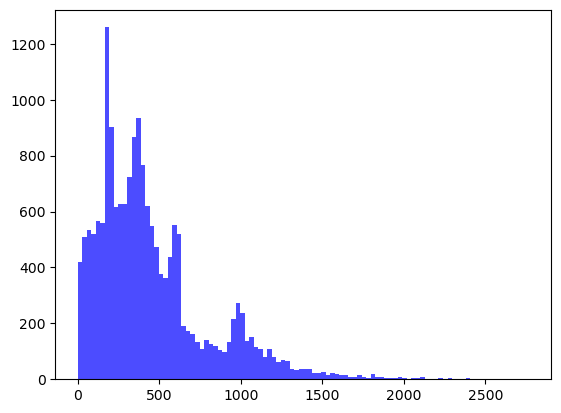

In [13]:
import numpy as np
from scipy.stats import truncnorm
import matplotlib.pyplot as plt
# ==========================================
# 1. 定义拒绝采样函数 (和之前处理 Dist 的逻辑一模一样)
# ==========================================
def sample_source(center, err_plus, err_minus, n_needed=1000, batch_size=5000):
    valid_samples = np.array([])
    # 循环直到凑够 n_needed (1000) 个
    while len(valid_samples) < n_needed:
        # 1. 每次生成一大批 (5000个)
        # 上半部分 (50%)
        upper = truncnorm.rvs(0, np.inf, loc=center, scale=err_plus, size=batch_size // 2)
        # 下半部分 (50%)
        lower = truncnorm.rvs(-np.inf, 0, loc=center, scale=err_minus, size=batch_size - (batch_size // 2))
        # 拼接
        batch = np.concatenate((upper, lower))
        # 2. 【核心】拒绝负值 (只保留 > 0)
        # 速度必须是正的，物理上没有负速率
        good_batch = batch[batch > 0]
        # 3. 加入池子
        valid_samples = np.concatenate((valid_samples, good_batch))
    
    # 4. 打乱并截取前 1000 个
    np.random.shuffle(valid_samples)
    return valid_samples[:n_needed]

print(f"开始处理 {len(V_3D_new)} 个源的速度采样...")

all_v3d_samples = []
# 遍历每个源
for i in range(len(V_3D_new)):
    # 提取当前源的参数
    v_cen = V_3D_new[i]
    v_upp = V_3D_err_pos[i]
    v_low = V_3D_err_neg[i]
    
    # 执行采样
    # 这里会自动处理负值拒绝，并保证返回严格的 1000 个
    samples = sample_source(v_cen, v_upp, v_low, n_needed=1000)
    # 存入列表
    all_v3d_samples.extend(samples)
    
    # 打印进度 (可选)
    print(f"源 {i+1}: Center={v_cen:.1f} (+{v_upp:.1f}/-{v_low:.1f}) -> Sampled Mean={np.mean(samples):.1f}")
final_v3d_flat = np.array(all_v3d_samples)

print("\n处理完成！")
print(f"最终数组形状: {final_v3d_flat.shape}") # 应该是 (12000,)
print(f"是否包含负值: {np.any(final_v3d_flat < 0)}") # 应该是 False

# 如果需要保存
np.savetxt("v3d_mc_samples_noback.txt", final_v3d_flat)
print(len(final_v3d_flat))
plt.hist(final_v3d_flat, bins=100, alpha=0.7, color='blue')

18000


Text(0, 0.5, 'Number of Samples')

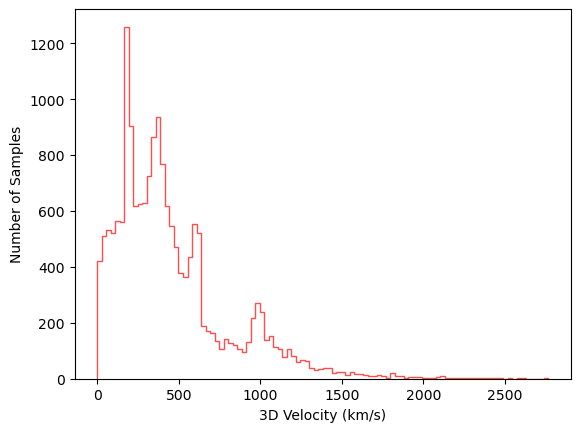

In [14]:
samples_18_noback=np.loadtxt("/home/lz/work/pulsar_kick_velocity/v3d_mc_samples_noback.txt")
print(len(samples_18_noback))
plt.hist(samples_18_noback, bins=100, alpha=0.7, histtype='step', color='red')
plt.xlabel('3D Velocity (km/s)')
plt.ylabel('Number of Samples')

In [15]:
import numpy as np
from scipy.special import erf
from scipy.stats import beta as beta_dist
from scipy.stats import truncnorm
from scipy.interpolate import interp1d
import bilby
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from bilby.core.prior import Uniform
from bilby.core.sampler import run_sampler
from bilby.core.prior import LogUniform
from bilby.hyper.likelihood import HyperparameterLikelihood
from scipy import interpolate
from scipy import integrate
import random
import argparse
import os
import glob
import warnings
warnings.filterwarnings("ignore")
#####################
samples_new=samples_18_noback
outdir='hy_outdir'
data_exp=samples_new
import sys
#import utilizes
n_samples=1000
npool=300
NN=int(len(data_exp)/n_samples)
nlive=2000
mx=n_samples
#################################
data_df=list()
ns_m=abs(data_exp)
for i in range(NN):
    re=pd.DataFrame(ns_m[i*mx:(i+1)*mx],columns=['mu'])
    data_df.append(re)
samples = data_df

def run_prior(dataset):
    return 1



In [16]:
print(min(samples_new),max(samples_new))

0.16863367951008001 2764.9503110250644


18:34 bilby INFO    : Running for label 'u_hype_58880', output will be saved to 'hy_outdir'


18:34 bilby INFO    : Analysis priors:
18:34 bilby INFO    : k=LogUniform(minimum=0.01, maximum=10, name='k', latex_label='$k$', unit=None, boundary=None)
18:34 bilby INFO    : theta=Uniform(minimum=1, maximum=500, name='theta', latex_label='$\\theta$(km/s)', unit=None, boundary=None)
18:34 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.HyperparameterLikelihood'>
18:34 bilby INFO    : Analysis likelihood noise evidence: 0
18:34 bilby INFO    : Single likelihood evaluation took 1.989e-04 s
18:34 bilby INFO    : Using sampler Dynesty with kwargs {'nlive': 2000, 'bound': 'live', 'sample': 'act-walk', 'periodic': None, 'reflective': None, 'update_interval': 600, 'first_update': None, 'rstate': None, 'queue_size': 300, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': None, 'bootstrap': None, 'walks': 100, 'facc': 0.2, 'slices': None, 'ncdim': None, 'blob': False, 'sa

1it [00:00, ?it/s]

/home/lz/miniconda3/envs/lz/lib/python3.13/site-packages/bilby/hyper/likelihood.py:64: RuntimeWarning: divide by zero encountered in log
  log_l = np.sum(np.log(np.sum(self.hyper_prior.prob(self.data, **parameters) /
/home/lz/miniconda3/envs/lz/lib/python3.13/site-packages/bilby/hyper/likelihood.py:64: RuntimeWarning: divide by zero encountered in log
  log_l = np.sum(np.log(np.sum(self.hyper_prior.prob(self.data, **parameters) /
/home/lz/miniconda3/envs/lz/lib/python3.13/site-packages/bilby/hyper/likelihood.py:64: RuntimeWarning: divide by zero encountered in log
  log_l = np.sum(np.log(np.sum(self.hyper_prior.prob(self.data, **parameters) /
/home/lz/miniconda3/envs/lz/lib/python3.13/site-packages/bilby/hyper/likelihood.py:64: RuntimeWarning: divide by zero encountered in log
  log_l = np.sum(np.log(np.sum(self.hyper_prior.prob(self.data, **parameters) /
/home/lz/miniconda3/envs/lz/lib/python3.13/site-packages/bilby/hyper/likelihood.py:64: RuntimeWarning: divide by zero encountered in

18:35 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
18:35 bilby INFO    : Summary of results:
nsamples: 6185
ln_noise_evidence:  0.000
ln_evidence: -126.926 +/-  0.048
ln_bayes_factor: -126.926 +/-  0.048



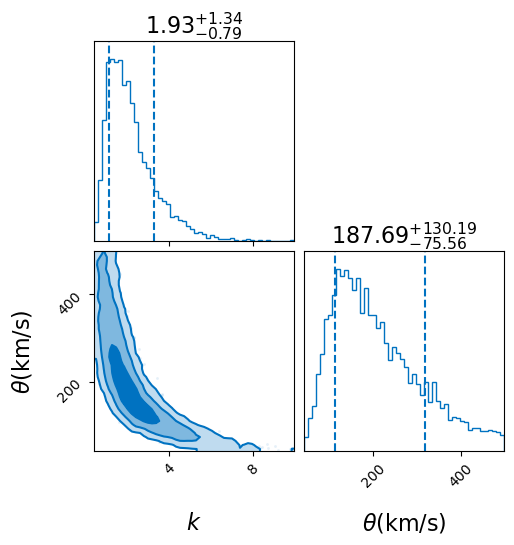

In [18]:
from scipy.special import beta
from scipy.special import gamma
def hyper_prior_gamma(dataset, k,theta):
    return (1 / (gamma(k)*theta**k)) * dataset['mu']**(k-1) *np.exp(-dataset['mu']/theta)

hp_priors_gamma = dict(k=LogUniform(0.01,10, 'k',r'$k$'),
                theta=Uniform(1, 500, 'theta',r'$\theta$(km/s)') )

hyper_prior_gamma=hyper_prior_gamma

hp_likelihood_gamma = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_gamma,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_gamma =hp_priors_gamma
# And run sampler
result_gamma = run_sampler(
    likelihood=hp_likelihood_gamma, priors=hp_priors_gamma, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='u_hype_{}'.format(np.random.randint(1,88888)),
    verbose=True, clean=True,npool=npool)
result_gamma.plot_corner(title_fmt='.1f')

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_1322928/2974162998.py:4: SyntaxWarning: invalid escape sequence '\m'
  hp_priors_lognorm = dict(s_mu=Uniform(1, 10, 's_mu', '$\mu$'),
/tmp/ipykernel_1322928/2974162998.py:5: SyntaxWarning: invalid escape sequence '\s'
  s_sigma=LogUniform(0.01, 10, 's_sigma', '$\sigma$') )
18:35 bilby INFO    : Running for label 'u_hype_60862', output will be saved to 'hy_outdir'
18:35 bilby INFO    : Analysis priors:
18:35 bilby INFO    : s_mu=Uniform(minimum=1, maximum=10, name='s_mu', latex_label='$\\mu$', unit=None, boundary=None)
18:35 bilby INFO    : s_sigma=LogUniform(minimum=0.01, maximum=10, name='s_sigma', latex_label='$\\sigma$', unit=None, boundary=None)
18:35 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.HyperparameterLikelihood'>
18:35 bilby INFO    

1it [00:00, ?it/s]

18:36 bilby INFO    : Written checkpoint file hy_outdir/u_hype_60862_resume.pickle
18:36 bilby INFO    : Starting to close worker pool.
18:36 bilby INFO    : Finished closing worker pool.


18:36 bilby INFO    : Rejection sampling nested samples to obtain 5736 posterior samples
18:36 bilby INFO    : Sampling time: 0:00:25.022038
18:36 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
18:36 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
18:36 bilby INFO    : Summary of results:
nsamples: 5736
ln_noise_evidence:  0.000
ln_evidence: -127.920 +/-  0.059
ln_bayes_factor: -127.920 +/-  0.059



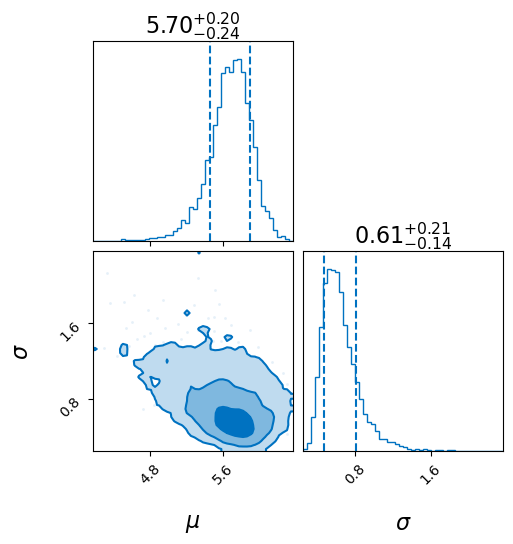

In [19]:
def hyper_prior_lognorm(dataset, s_mu, s_sigma):
    return np.exp(- (np.log(dataset['mu']) - s_mu)**2 / (2 * s_sigma**2)) /\
        (2 * np.pi * s_sigma**2)**0.5/(dataset['mu'])
hp_priors_lognorm = dict(s_mu=Uniform(1, 10, 's_mu', '$\mu$'),
                 s_sigma=LogUniform(0.01, 10, 's_sigma', '$\sigma$') )

hyper_prior_lognorm=hyper_prior_lognorm
hp_likelihood_lognorm = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_lognorm,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_lognorm =hp_priors_lognorm

# And run sampler
result_lognorm = run_sampler(
    likelihood=hp_likelihood_lognorm, priors=hp_priors_lognorm, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='u_hype_{}'.format(np.random.randint(1,88888)),
    verbose=True, clean=True,npool=npool)
result_lognorm.plot_corner()

18:36 bilby INFO    : Running for label 'maxwell_hype_72354', output will be saved to 'hy_outdir'
18:36 bilby INFO    : Analysis priors:
18:36 bilby INFO    : sigma=Uniform(minimum=10, maximum=2500, name='sigma', latex_label='$\\sigma$', unit=None, boundary=None)
18:36 bilby INFO    : mlo=LogUniform(minimum=0.1, maximum=400, name='mlo', latex_label='$\\rm{v^{lo}}$', unit=None, boundary=None)
18:36 bilby INFO    : mup=Uniform(minimum=400, maximum=4000, name='mup', latex_label='$\\rm{v^{up}}$', unit=None, boundary=None)
18:36 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.HyperparameterLikelihood'>
18:36 bilby INFO    : Analysis likelihood noise evidence: 0
/home/lz/miniconda3/envs/lz/lib/python3.13/site-packages/bilby/hyper/likelihood.py:64: RuntimeWarning: divide by zero encountered in log
  log_l = np.sum(np.log(np.sum(self.hyper_prior.prob(self.data, **parameters) /
18:36 bilby INFO    : Single likelihood evaluation took 4.537e-04 s
18:36 bilby INFO    : Us

1it [00:00, ?it/s]

18:37 bilby INFO    : Written checkpoint file hy_outdir/maxwell_hype_72354_resume.pickle
18:37 bilby INFO    : Starting to close worker pool.
18:37 bilby INFO    : Finished closing worker pool.
18:37 bilby INFO    : Rejection sampling nested samples to obtain 4316 posterior samples
18:37 bilby INFO    : Sampling time: 0:00:25.866011
18:37 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 


18:37 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
18:37 bilby INFO    : Summary of results:
nsamples: 4316
ln_noise_evidence:  0.000
ln_evidence: -128.628 +/-  0.051
ln_bayes_factor: -128.628 +/-  0.051



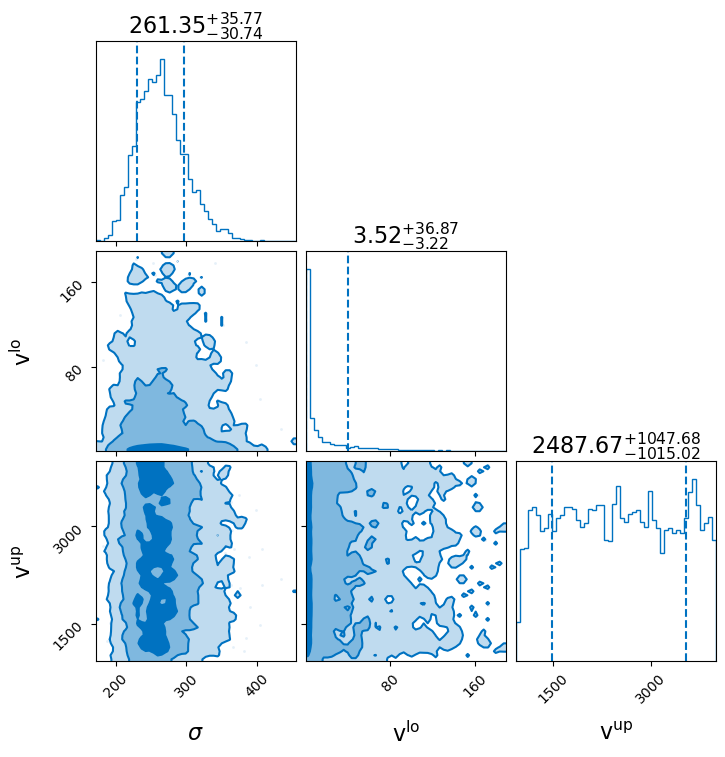

In [20]:
from scipy.stats import maxwell
from scipy.integrate import quad
def hyper_prior_maxwell(dataset,mlo,mup,sigma):
    log_likelihood = ((dataset['mu'] >= mlo) & (dataset['mu'] <= mup)) * maxwell.pdf(dataset['mu'],scale=sigma)
    return log_likelihood

hp_priors_maxwell = dict(sigma=Uniform(10, 2500, 'sigma', r'$\sigma$'),
                        mlo=LogUniform(0.1,400,'mlo', r'$\rm{v^{lo}}$'),
                        mup=Uniform(400,4000,'mup', r'$\rm{v^{up}}$')
                        )

hyper_prior_maxwell = hyper_prior_maxwell
hp_likelihood_maxwell = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_maxwell,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_maxwell = hp_priors_maxwell
result_maxwell = run_sampler(
    likelihood=hp_likelihood_maxwell, priors=hp_priors_maxwell, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='maxwell_hype_{}'.format(np.random.randint(1, 88888)),
    verbose=True, clean=True, npool=npool)

result_maxwell.plot_corner()

18:37 bilby INFO    : Running for label 'double_maxwell_hype_35237', output will be saved to 'hy_outdir'
18:37 bilby INFO    : Analysis priors:
18:37 bilby INFO    : sigma1=Uniform(minimum=10, maximum=2500, name='sigma1', latex_label='$\\sigma_1$(km/s)', unit=None, boundary=None)
18:37 bilby INFO    : sigma2=Uniform(minimum=10, maximum=2500, name='sigma2', latex_label='$\\sigma_2$(km/s)', unit=None, boundary=None)
18:37 bilby INFO    : alpha=Uniform(minimum=0.01, maximum=0.99, name='alpha', latex_label='$\\alpha$', unit=None, boundary=None)
18:37 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.HyperparameterLikelihood'>
18:37 bilby INFO    : Analysis likelihood noise evidence: 0
/home/lz/miniconda3/envs/lz/lib/python3.13/site-packages/bilby/hyper/likelihood.py:64: RuntimeWarning: divide by zero encountered in log
  log_l = np.sum(np.log(np.sum(self.hyper_prior.prob(self.data, **parameters) /
18:37 bilby INFO    : Single likelihood evaluation took 7.604e-04 s
1

1it [00:00, ?it/s]

18:38 bilby INFO    : Written checkpoint file hy_outdir/double_maxwell_hype_35237_resume.pickle
18:38 bilby INFO    : Starting to close worker pool.
18:38 bilby INFO    : Finished closing worker pool.


18:38 bilby INFO    : Rejection sampling nested samples to obtain 6931 posterior samples
18:38 bilby INFO    : Sampling time: 0:01:03.681248
18:38 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
18:38 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
18:38 bilby INFO    : Summary of results:
nsamples: 6931
ln_noise_evidence:  0.000
ln_evidence: -127.934 +/-  0.058
ln_bayes_factor: -127.934 +/-  0.058



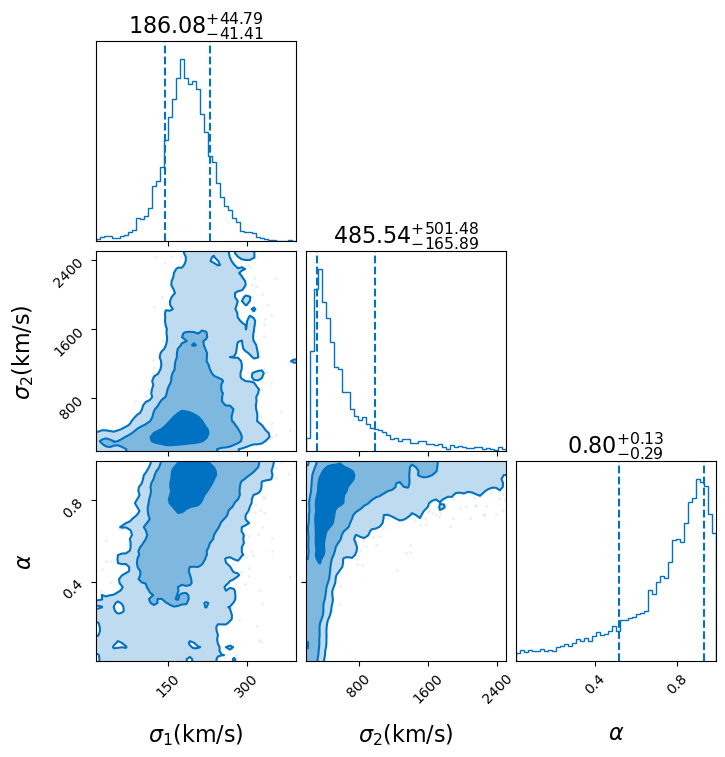

In [21]:
def hyper_prior_double_maxwell(dataset,sigma1, sigma2, alpha):
    mup=4000
    mlo=0.1
    # 数据范围限制
    sigma_constraint = (mlo < sigma1) & (sigma1 < sigma2) & (sigma2 < mup)
    valid_range = (dataset['mu'] >= mlo) & (dataset['mu'] <= mup)
    
    # Maxwell PDF for the two components
    pdf1 = maxwell.pdf(dataset['mu'], scale=sigma1)
    pdf2 = maxwell.pdf(dataset['mu'], scale=sigma2)
    # Combined mixture PDF
    mixture_pdf = alpha * pdf1 + (1 - alpha) * pdf2
    # Apply range restriction
    log_likelihood = sigma_constraint*valid_range * mixture_pdf
    return log_likelihood

hp_priors_double_maxwell = dict(
    sigma1=Uniform(10, 2500, 'sigma1', r'$\sigma_1$(km/s)'),
    sigma2=Uniform(10, 2500, 'sigma2', r'$\sigma_2$(km/s)'),
    alpha=Uniform(0.01, 0.99, 'alpha', r'$\alpha$')
)

hyper_prior_double_maxwell = hyper_prior_double_maxwell

hp_likelihood_double_maxwell = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_double_maxwell,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_double_maxwell = hp_priors_double_maxwell
# 运行采样器
result_2M = run_sampler(
    likelihood=hp_likelihood_double_maxwell, priors=hp_priors_double_maxwell, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='double_maxwell_hype_{}'.format(np.random.randint(1, 88888)),
    verbose=True, clean=True, npool=npool)

# 绘制角图
result_2M.plot_corner()

18:39 bilby INFO    : Running for label 'u_hype_39435', output will be saved to 'hy_outdir'
18:39 bilby INFO    : Analysis priors:
18:39 bilby INFO    : mlo=LogUniform(minimum=0.1, maximum=400, name='mlo', latex_label='$\\rm{v^l}$', unit=None, boundary=None)
18:39 bilby INFO    : mup=Uniform(minimum=400, maximum=4000, name='mup', latex_label='$\\rm{v^u}$', unit=None, boundary=None)
18:39 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.HyperparameterLikelihood'>
18:39 bilby INFO    : Analysis likelihood noise evidence: 0
/home/lz/miniconda3/envs/lz/lib/python3.13/site-packages/bilby/hyper/likelihood.py:64: RuntimeWarning: divide by zero encountered in log
  log_l = np.sum(np.log(np.sum(self.hyper_prior.prob(self.data, **parameters) /
18:39 bilby INFO    : Single likelihood evaluation took 1.126e-04 s
18:39 bilby INFO    : Using sampler Dynesty with kwargs {'nlive': 2000, 'bound': 'live', 'sample': 'act-walk', 'periodic': None, 'reflective': None, 'update_interv

1it [00:00, ?it/s]

18:39 bilby INFO    : Written checkpoint file hy_outdir/u_hype_39435_resume.pickle
18:39 bilby INFO    : Starting to close worker pool.
18:39 bilby INFO    : Finished closing worker pool.
18:39 bilby INFO    : Rejection sampling nested samples to obtain 7797 posterior samples
18:39 bilby INFO    : Sampling time: 0:00:21.088593
18:39 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 


18:39 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
18:39 bilby INFO    : Summary of results:
nsamples: 7797
ln_noise_evidence:  0.000
ln_evidence: -127.475 +/-  0.049
ln_bayes_factor: -127.475 +/-  0.049



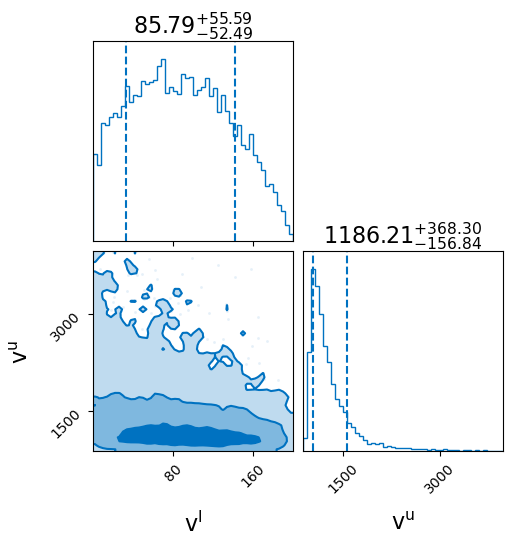

In [22]:
def hyper_prior_logu(dataset,mlo,mup):
    return (( dataset['mu'] >= mlo) & (dataset['mu'] <= mup))/( dataset['mu'] * np.log(mup / mlo) )

hp_priors_logu = dict(mlo=LogUniform(0.1, 400, 'mlo',r'$\rm{v^l}$'),
                mup=Uniform(400, 4000, 'mup',r'$\rm{v^u}$'))
#end log-uniform

hyper_prior_logu=hyper_prior_logu

hp_likelihood_logu = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_logu,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_logu =hp_priors_logu

# And run sampler
result_logu = run_sampler(
    likelihood=hp_likelihood_logu, priors=hp_priors_logu, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='u_hype_{}'.format(np.random.randint(1,88888)),
    verbose=True, clean=True,npool=npool)
result_logu.plot_corner()

<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_1322928/2992944831.py:8: SyntaxWarning: invalid escape sequence '\m'
  hp_priors_G_fixed_max_min= dict(mu=Uniform(10, 4000, 's_mu', '$\mu$'),
/tmp/ipykernel_1322928/2992944831.py:9: SyntaxWarning: invalid escape sequence '\s'
  sigma=Uniform(10, 1500, 's_sigma', '$\sigma$'))
18:40 bilby INFO    : Running for label 'u_hype_44208', output will be saved to 'hy_outdir'
18:40 bilby INFO    : Analysis priors:
18:40 bilby INFO    : mu=Uniform(minimum=10, maximum=4000, name='s_mu', latex_label='$\\mu$', unit=None, boundary=None)
18:40 bilby INFO    : sigma=Uniform(minimum=10, maximum=1500, name='s_sigma', latex_label='$\\sigma$', unit=None, boundary=None)
18:40 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.HyperparameterLikelihood'>
18:40 bilby INFO    : 

1it [00:00, ?it/s]

18:40 bilby INFO    : Written checkpoint file hy_outdir/u_hype_44208_resume.pickle
18:40 bilby INFO    : Starting to close worker pool.
18:40 bilby INFO    : Finished closing worker pool.
18:40 bilby INFO    : Rejection sampling nested samples to obtain 4858 posterior samples
18:40 bilby INFO    : Sampling time: 0:00:21.703341
18:40 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 


18:40 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
18:40 bilby INFO    : Summary of results:
nsamples: 4858
ln_noise_evidence:  0.000
ln_evidence: -128.587 +/-  0.057
ln_bayes_factor: -128.587 +/-  0.057



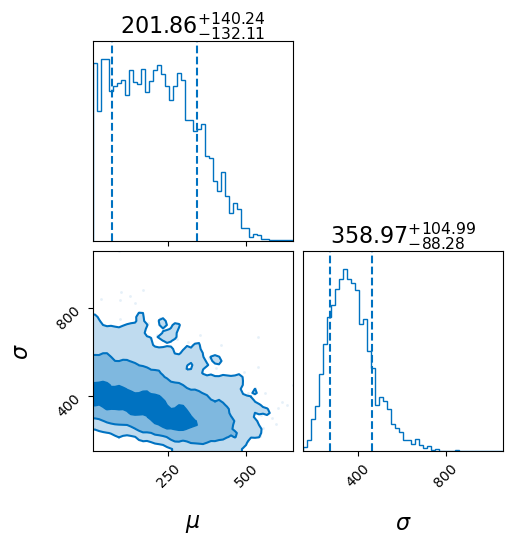

In [23]:
#begin Gaussian model with fixed upper and lower mass
def hyper_prior_G_fixed_max_min(dataset, mu, sigma):
    mup=4000
    mlo=0.1
    normalisingTerm = 0.5 * ( erf((mu-mlo)/(np.sqrt(2) * sigma)) -  erf((mu-mup)/(np.sqrt(2) * sigma)) )
    return ( ( dataset['mu'] >= mlo) & (dataset['mu'] <= mup))*((mu>mlo)&(mu<mup)) * (np.exp(- (dataset['mu'] - mu)**2 / (2 * sigma**2)) /\
        (2 * np.pi * sigma**2)**0.5) / normalisingTerm 
hp_priors_G_fixed_max_min= dict(mu=Uniform(10, 4000, 's_mu', '$\mu$'),
                 sigma=Uniform(10, 1500, 's_sigma', '$\sigma$'))
#end Gaussian with fixed upper and lower ma
#end Gaussian model 
hyper_prior_G=hyper_prior_G_fixed_max_min
hp_likelihood_G = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_G,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_G =hp_priors_G_fixed_max_min

# And run sampler
result_G = run_sampler(
    likelihood=hp_likelihood_G, priors=hp_priors_G, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='u_hype_{}'.format(np.random.randint(1,88888)),
    verbose=True, clean=True,npool=npool)
result_G.plot_corner()

<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_1322928/4053243987.py:9: SyntaxWarning: invalid escape sequence '\m'
  hp_priors_2G_fixed_max_min = dict(mu1=Uniform(10, 4000, 'mu1', '$\mu_1$'),
/tmp/ipykernel_1322928/4053243987.py:10: SyntaxWarning: invalid escape sequence '\s'
  sigma1=Uniform(10, 1500, 'sigma1', '$\sigma_1$'),
/tmp/ipykernel_1322928/4053243987.py:11: SyntaxWarning: invalid escape sequence '\m'
  mu2=Uniform(10, 4000, 'mu2', '$\mu_2$'),
/tmp/ipykernel_1322928/4053243987.py:12: SyntaxWarning: invalid escape sequence '\s'
  sigma2=Uniform(10, 1500, 'sigma2', '$\sigma_2$'),
18:41 bilby INFO    : Running f

1it [00:00, ?it/s]

18:44 bilby INFO    : Written checkpoint file hy_outdir/u_hype_66943_resume.pickle
18:44 bilby INFO    : Starting to close worker pool.
18:44 bilby INFO    : Finished closing worker pool.


18:44 bilby INFO    : Rejection sampling nested samples to obtain 6456 posterior samples
18:44 bilby INFO    : Sampling time: 0:03:29.598495
18:44 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
18:45 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
18:45 bilby INFO    : Summary of results:
nsamples: 6456
ln_noise_evidence:  0.000
ln_evidence: -129.480 +/-  0.058
ln_bayes_factor: -129.480 +/-  0.058



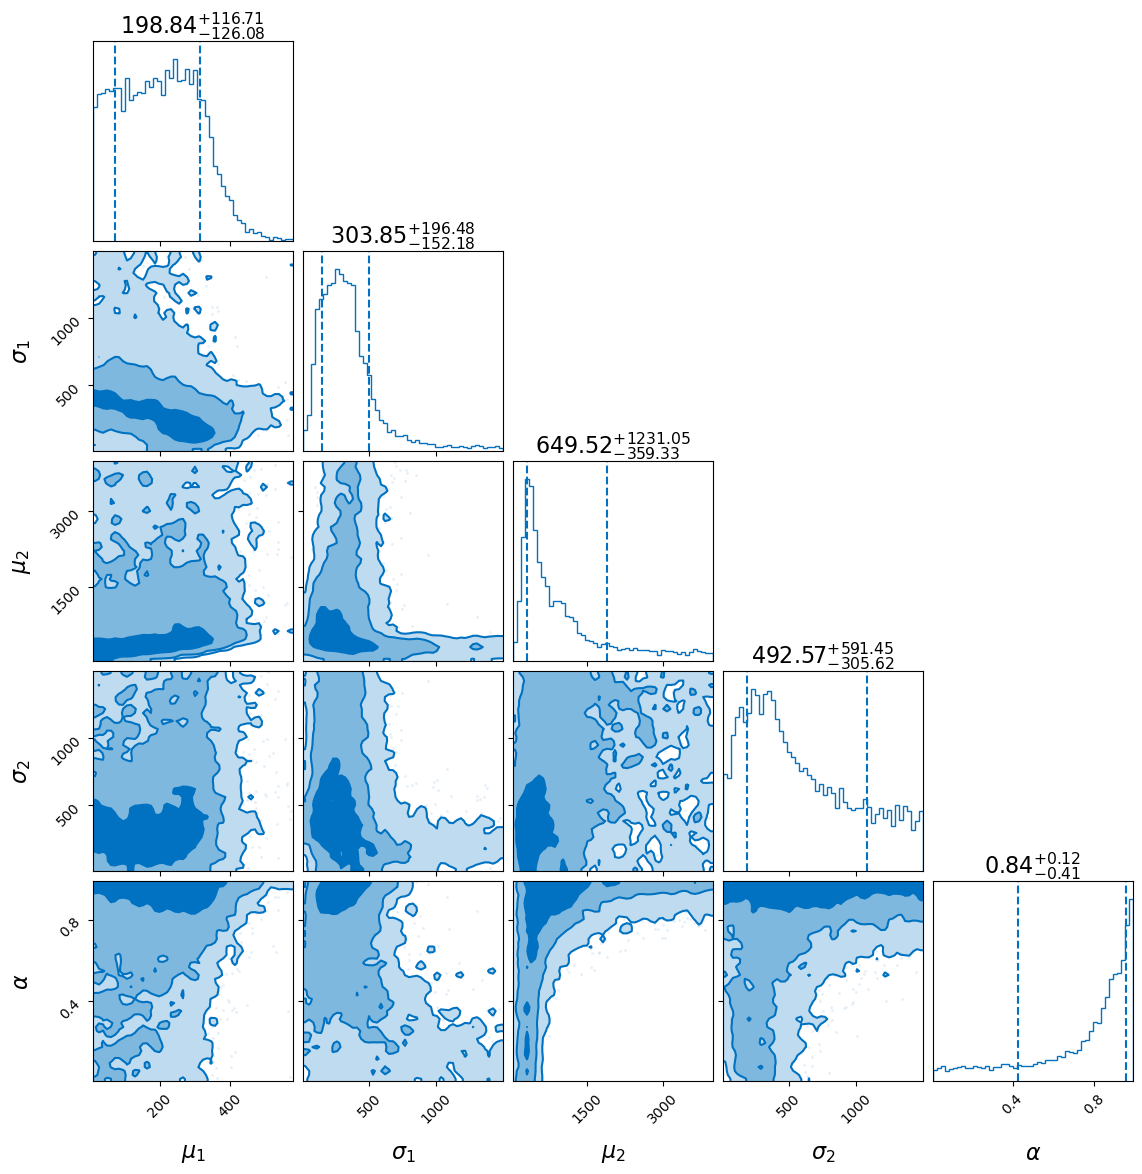

In [24]:
def hyper_prior_2G_fixed_max_min(dataset, mu1, sigma1,mu2,sigma2,alpha):
    mup=4000
    mlo=0.1
    normalisingTerm1 = 0.5 * ( erf((mu1-mlo)/(np.sqrt(2) * sigma1)) -  erf((mu1-mup)/(np.sqrt(2) * sigma1)) )
    normalisingTerm2 = 0.5 * ( erf((mu2-mlo)/(np.sqrt(2) * sigma2)) -  erf((mu2-mup)/(np.sqrt(2) * sigma2)) )
    return ((mu2 < mup ) & (mu1 > mlo) & (mu1 < mu2)  & ( dataset['mu'] >= mlo) & (dataset['mu'] <= mup)) *\
        ( (( alpha*(np.exp(- (dataset['mu'] - mu1)**2 / (2 * sigma1**2)) /(2 * np.pi * sigma1**2)**0.5)) /normalisingTerm1) +\
        (1-alpha)*( ((np.exp(- (dataset['mu'] - mu2)**2 / (2 * sigma2**2)) /(2 * np.pi * sigma2**2)**0.5) ) / normalisingTerm2) )
hp_priors_2G_fixed_max_min = dict(mu1=Uniform(10, 4000, 'mu1', '$\mu_1$'),
                 sigma1=Uniform(10, 1500, 'sigma1', '$\sigma_1$'),
                mu2=Uniform(10, 4000, 'mu2', '$\mu_2$'),
                sigma2=Uniform(10, 1500, 'sigma2', '$\sigma_2$'),
                alpha=Uniform(0.01, 0.99, 'alpha', '$\\alpha$'))
#end two-Gausssian model with fixed lower and upper mass
 
hyper_prior_2G=hyper_prior_2G_fixed_max_min
hp_likelihood_2G = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_2G,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_2G =hp_priors_2G_fixed_max_min

# And run sampler
result_2G = run_sampler(
    likelihood=hp_likelihood_2G, priors=hp_priors_2G, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='u_hype_{}'.format(np.random.randint(1,88888)),
    verbose=True, clean=True,npool=npool)
result_2G.plot_corner()

18:45 bilby INFO    : Running for label 'u_hype_72025', output will be saved to 'hy_outdir'
18:46 bilby INFO    : Analysis priors:
18:46 bilby INFO    : mu=Uniform(minimum=10, maximum=4000, name='mlo', latex_label='$\\rm{\\mu}$', unit=None, boundary=None)
18:46 bilby INFO    : sigma=Uniform(minimum=10, maximum=1500, name='sigma', latex_label='$\\rm{\\sigma}$', unit=None, boundary=None)
18:46 bilby INFO    : nu=LogUniform(minimum=0.01, maximum=100, name='nu', latex_label='$\\rm{\\nu}$', unit=None, boundary=None)
18:46 bilby INFO    : tau=LogUniform(minimum=2.01, maximum=30, name='tau', latex_label='$\\rm{\\tau}$', unit=None, boundary=None)
18:46 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.HyperparameterLikelihood'>
18:46 bilby INFO    : Analysis likelihood noise evidence: 0
18:46 bilby INFO    : Single likelihood evaluation took 4.154e-04 s
18:46 bilby INFO    : Using sampler Dynesty with kwargs {'nlive': 2000, 'bound': 'live', 'sample': 'act-walk', 'period

1it [00:00, ?it/s]

18:51 bilby INFO    : Written checkpoint file hy_outdir/u_hype_72025_resume.pickle
18:51 bilby INFO    : Starting to close worker pool.
18:51 bilby INFO    : Finished closing worker pool.


18:51 bilby INFO    : Rejection sampling nested samples to obtain 5936 posterior samples
18:51 bilby INFO    : Sampling time: 0:05:08.919862
18:51 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
18:51 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
18:51 bilby INFO    : Summary of results:
nsamples: 5936
ln_noise_evidence:  0.000
ln_evidence: -129.277 +/-  0.068
ln_bayes_factor: -129.277 +/-  0.068



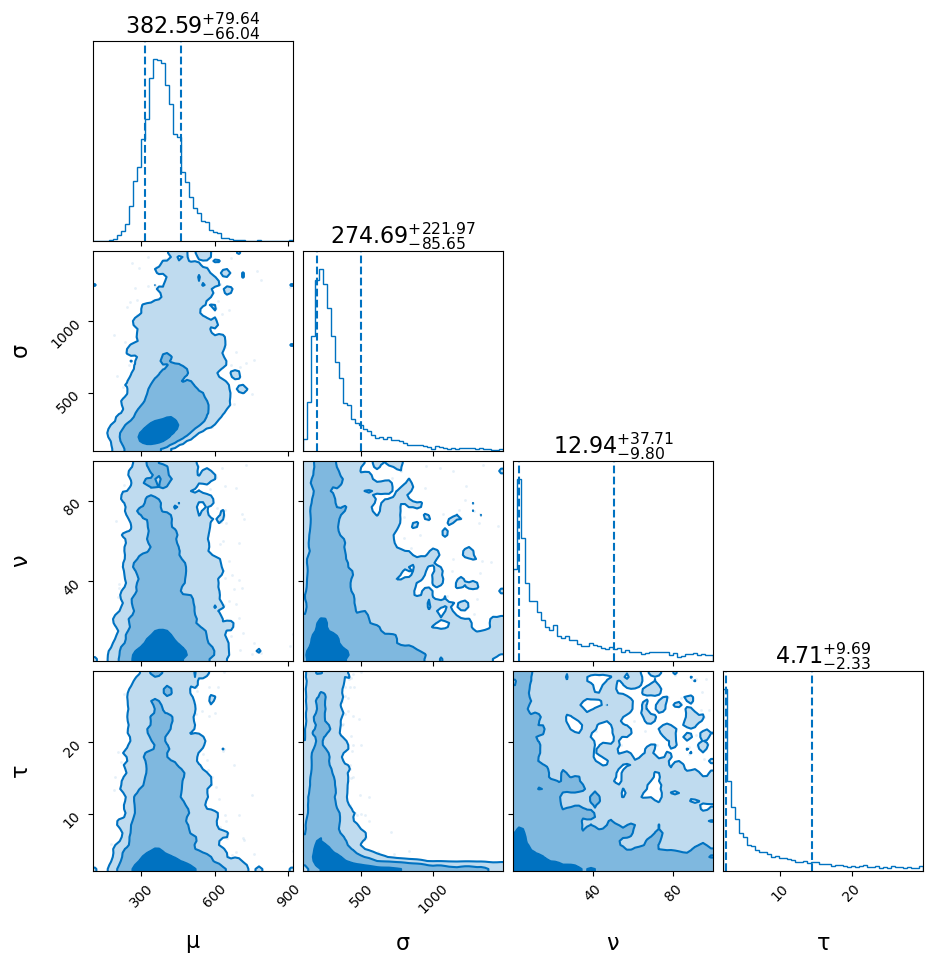

In [25]:
#begin SST
from scipy.special import beta
def hyper_prior_sst(dataset, mu,sigma,nu,tau):
        c = 2 * nu * ((1 + nu ** 2) *
                                beta(0.5, tau / 2) *
                                tau ** 0.5) ** -1
        m = ((2 * tau ** 0.5) * (nu - nu ** -1)) / (
                (tau - 1) * beta(0.5, 0.5 * tau))
        s2 = ((tau / (tau - 2)) * (
                nu ** 2 + nu ** -2 - 1) - m ** 2)
        mu_0 = mu - (sigma * m / np.sqrt(s2))
        sigma_0 = sigma / np.sqrt(s2)
        z = (dataset['mu'] - mu_0) / sigma_0
        p = np.where(dataset['mu'] < mu_0,
                     (c / sigma_0) * (1 + ((nu ** 2) * (z ** 2)) / tau) ** (
                             -(tau + 1) / 2),
                     (c / sigma_0) * (1 + (z ** 2) / ((nu ** 2) * tau)) ** (
                             -(tau + 1) / 2))
        return p

hp_priors_sst = dict(mu=Uniform(10, 4000, 'mlo',r'$\rm{\mu}$'),
                sigma=Uniform(10, 1500, 'sigma',r'$\rm{\sigma}$'),
                nu=LogUniform(0.01,100,'nu',r'$\rm{\nu}$'),
                tau=LogUniform(2.01,30,'tau',r'$\rm{\tau}$') )
#end SST

hyper_prior_sst=hyper_prior_sst
hp_likelihood_sst = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_sst,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_sst =hp_priors_sst

# And run sampler
result_sst = run_sampler(
    likelihood=hp_likelihood_sst, priors=hp_priors_sst, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='u_hype_{}'.format(np.random.randint(1,88888)),
    verbose=True, clean=True,npool=npool)
result_sst.plot_corner()

18:52 bilby INFO    : Running for label 'exponential_hype_79453', output will be saved to 'hy_outdir'
18:52 bilby INFO    : Analysis priors:
18:52 bilby INFO    : lam=LogUniform(minimum=0.0001, maximum=0.01, name='lam', latex_label='$\\lambda$', unit=None, boundary=None)
18:52 bilby INFO    : mlo=LogUniform(minimum=0.01, maximum=400, name='mlo', latex_label='$\\rm{v^l}$', unit=None, boundary=None)
18:52 bilby INFO    : mup=LogUniform(minimum=400, maximum=4000, name='mup', latex_label='$\\rm{v^u}$', unit=None, boundary=None)
18:52 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.HyperparameterLikelihood'>
18:52 bilby INFO    : Analysis likelihood noise evidence: 0
/home/lz/miniconda3/envs/lz/lib/python3.13/site-packages/bilby/hyper/likelihood.py:64: RuntimeWarning: divide by zero encountered in log
  log_l = np.sum(np.log(np.sum(self.hyper_prior.prob(self.data, **parameters) /
18:52 bilby INFO    : Single likelihood evaluation took 4.226e-04 s
18:52 bilby INFO  

1it [00:00, ?it/s]

18:53 bilby INFO    : Written checkpoint file hy_outdir/exponential_hype_79453_resume.pickle
18:53 bilby INFO    : Starting to close worker pool.
18:53 bilby INFO    : Finished closing worker pool.
18:53 bilby INFO    : Rejection sampling nested samples to obtain 4655 posterior samples
18:53 bilby INFO    : Sampling time: 0:00:20.500458
18:53 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 


18:53 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
18:53 bilby INFO    : Summary of results:
nsamples: 4655
ln_noise_evidence:  0.000
ln_evidence: -127.395 +/-  0.039
ln_bayes_factor: -127.395 +/-  0.039



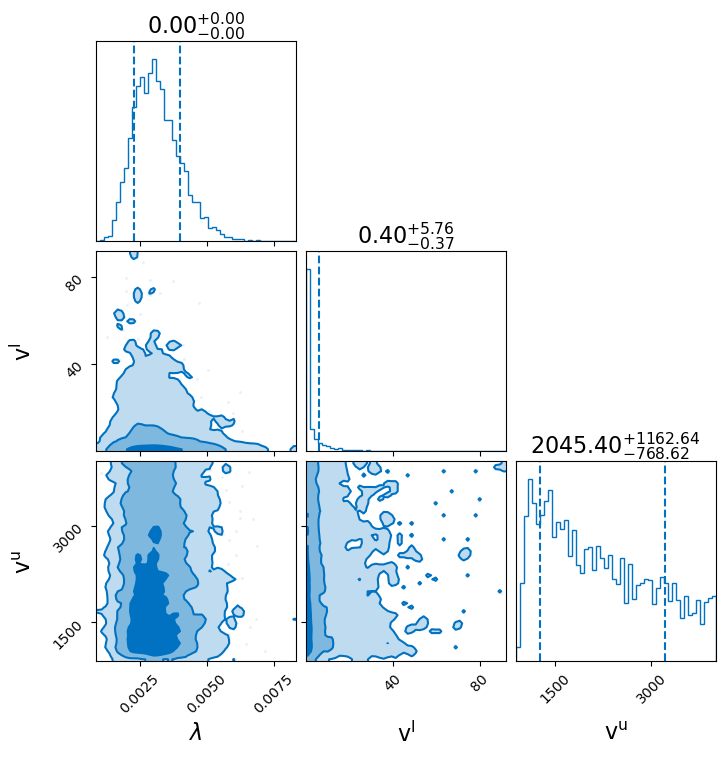

In [26]:
from scipy.stats import expon

def hyper_prior_exponential(dataset, mup, mlo, lam):
    valid_range = (dataset['mu'] >= mlo) & (dataset['mu'] <= mup)
    # Exponential PDF
    pdf_values = expon.pdf(dataset['mu'], scale=1/lam)
    # 限制范围外的概率为 0
    log_likelihood = valid_range * pdf_values
    return log_likelihood

hp_priors_exponential = dict(
    lam=LogUniform(0.0001, 0.01, 'lam', r'$\lambda$'),  # 速率参数范围
    mlo=LogUniform(0.01, 400, 'mlo', r'$\rm{v^l}$'),  # 下限范围
    mup=LogUniform(400, 4000, 'mup', r'$\rm{v^u}$')    # 上限范围
)

hyper_prior_exponential = hyper_prior_exponential

hp_likelihood_exponential = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_exponential,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_exponential = hp_priors_exponential

# 运行采样器
result_exponential = run_sampler(
    likelihood=hp_likelihood_exponential, priors=hp_priors_exponential, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='exponential_hype_{}'.format(np.random.randint(1, 88888)),
    verbose=True, clean=True, npool=npool)

# 绘制角图
result_exponential.plot_corner()

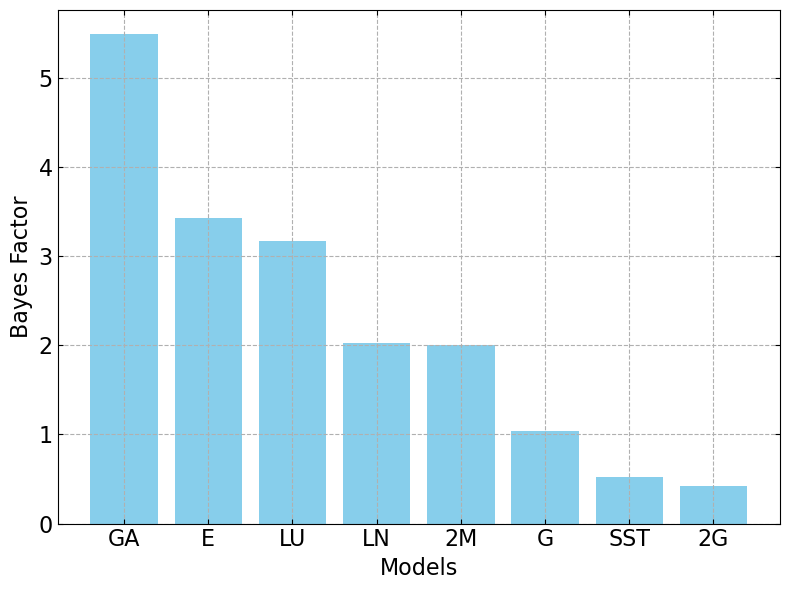

In [27]:
BF_gamma_maxwell=-126.926+128.628
BF_lognormal_maxwell=-127.920 +128.628
BF_loguniform_maxwell=-127.475+128.628
BF_gaussian_maxwell=-128.587+128.628
BF_double_gaussian_maxwell=-129.480+128.628
#BF_power_exponential=-158.387+161.920
BF_sst_maxwell=-129.277+128.628
BF_exponential_maxwell=-127.395+128.628
BF_double_maxwell_maxwell=-127.934+128.628
#------------------exp of BF----------------------
BF_gamma_maxwell_exp=np.exp(BF_gamma_maxwell)
BF_lognormal_maxwell_exp=np.exp(BF_lognormal_maxwell)
BF_loguniform_maxwell_exp=np.exp(BF_loguniform_maxwell)
BF_gaussian_maxwell_exp=np.exp(BF_gaussian_maxwell)
BF_double_gaussian_maxwell_exp=np.exp(BF_double_gaussian_maxwell)
#BF_power_exponential_exp=np.exp(BF_power_exponential)
BF_sst_maxwell_exp=np.exp(BF_sst_maxwell)
BF_exponential_maxwell_exp=np.exp(BF_exponential_maxwell)
BF_double_maxwell_maxwell_exp=np.exp(BF_double_maxwell_maxwell)
#-------------------------------------------------
from matplotlib.ticker import MultipleLocator,FuncFormatter
# Simplified labels for models
models = ["GA", "LN", "LU", "G", "2G", "SST","E","2M"]
'''
bayes_factors=[BF_gamma_exponential, BF_lognormal_exponential,BF_loguniform_exponential,
               BF_gaussian_exponential,BF_double_gaussian_exponential,
'''
bayes_factors=[BF_gamma_maxwell_exp, BF_lognormal_maxwell_exp,BF_loguniform_maxwell_exp,
               BF_gaussian_maxwell_exp,BF_double_gaussian_maxwell_exp,
               BF_sst_maxwell_exp,BF_exponential_maxwell_exp,BF_double_maxwell_maxwell_exp]
# 从大到小排序  
sorted_indices = np.argsort(bayes_factors)[::-1]
sorted_models = [models[i] for i in sorted_indices]
sorted_bayes_factors = [bayes_factors[i] for i in sorted_indices]

# 绘制柱状图
fig,ax=plt.subplots(figsize=(8,6))
#ax.set_xticks([-2,-1,0,1])
#ax.set_yticks([10**4,1.5*10**4,2*10**4,2.5*10**4])
plt.tick_params(top='on', right='on', which='both')
#ax.xaxis.set_minor_locator(MultipleLocator(0.1))
#ax.yaxis.set_minor_locator(MultipleLocator(10000))
ax.tick_params(axis='both',which='both',direction='in',labelsize=16)
plt.bar(sorted_models, sorted_bayes_factors, color='skyblue',log=False)

plt.ylabel("Bayes Factor", fontsize=16)
plt.xlabel("Models", fontsize=16)
#plt.title("Bayes Factors Comparison", fontsize=14)
#plt.yscale('log')
plt.tight_layout()
#plt.yscale('log')
plt.grid(linestyle='--')
plt.savefig('Bayes_factors_comparison_noback.pdf', dpi=300, transparent=True, bbox_inches='tight')
plt.show()